## DATA 620

---
### Project 1
### Mael Illien and Jeremy OBrien

Reference materials:
- [Foursquare Endpoints Overview](https://developer.foursquare.com/docs/places-api/endpoints/)
- [Foursquare Places API Next Venues](https://developer.foursquare.com/docs/api-reference/venues/nextvenues/)
- [Foursquare Places API Venue Categories](https://developer.foursquare.com/docs/api-reference/venues/categories/)
- [Foursquare Places API Authentication](https://developer.foursquare.com/docs/places-api/authentication/)
- [Building a Foursquare Location Graph](https://nbviewer.jupyter.org/github/furukama/IPythonNotebooks/blob/master/Building%20a%20Foursquare%20Location%20Graph.ipynb)
- [How to create a location graph from the Foursquare API](http://beautifuldata.net/2014/05/how-to-create-a-location-graph-from-the-foursquare-api/)
- [Classification of Moscow Metro stations using Foursquare data](https://towardsdatascience.com/classification-of-moscow-metro-stations-using-foursquare-data-fb8aad3e0e4)
- [A brief guide to using Foursquare API with a hands-on example in Python](https://medium.com/@aboutiana/a-brief-guide-to-using-foursquare-api-with-a-hands-on-example-on-python-6fc4d5451203)

Bounding box for NYC based on [geographic extent](https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/nybb_metadata.pdf?ver=18c)
- North 40.915568 
- South 40.495992
- East -73.699215
- West -74.257159 

In [141]:
# We can alternatively use the venue attribute City
bbox = [40.4959929,-74.257159,40.915568,-73.699215]  # bounding box for New York City

In [145]:
import foursquare
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from config import foursquare_config as fs_config

In [143]:
new_crawl = []  # list of locations to be crawled
done_crawl = []  # list of crawled locations 
links = []  # list of tuples that represent links between locations
venues = pd.DataFrame(columns=['id','name','type','lat','lng'])  # dataframe (not dict?) of location id => meta-data on location 

In [146]:
# Fill these out to run but don't save to Github
CLIENT_ID = fs_config['id']
CLIENT_SECRET = fs_config['secret']

client = foursquare.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

In [147]:
# Root
venue = client.venues('43695300f964a5208c291fe3')
venue['venue']

Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee04586867c843e1ac4273a'}
Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee04648237de16992e1c610'}
Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee045f3f3317b21abd734f5'}


FoursquareException: Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee045f3f3317b21abd734f5'}

In [84]:
# Example atrribute extracted from a next venue
nv = client.venues.nextvenues('43695300f964a5208c291fe3')['nextVenues']['items']
nv[0]['categories'][0]['shortName']

'Scenic Lookout'

In [87]:
client.venues.nextvenues('43695300f964a5208c291fe3')

{'nextVenues': {'count': 5,
  'items': [{'id': '4bcca12bb6c49c7422169491',
    'name': '86th Floor Observation Deck',
    'location': {'address': '350 5th Ave',
     'crossStreet': 'btwn 33rd & 34th Sts',
     'lat': 40.74844544481811,
     'lng': -73.98568124187432,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.74844544481811,
       'lng': -73.98568124187432}],
     'postalCode': '10118',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['350 5th Ave (btwn 33rd & 34th Sts)',
      'New York, NY 10118',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d165941735',
      'name': 'Scenic Lookout',
      'pluralName': 'Scenic Lookouts',
      'shortName': 'Scenic Lookout',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/sceniclookout_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '64514350'}},
   {'id': '49b7ed6df964a520305

In [56]:
def is_in_NYC(lat, long):
    print((lat > bbox[0]) & (lat < bbox[2]) & (long > bbox[1]) & (long < bbox[3]))
    return (lat > bbox[0]) & (lat < bbox[2]) & (long > bbox[1]) & (long < bbox[3])

In [ ]:
def extract_venue_data(venue):
    #print(venue)
    
    data = {'id': [venue['venue']['id']],
            'name': [venue['venue']['name']],
            'type': [venue['venue']['categories'][0]['shortName']],
            'lat': [venue['venue']['location']['lat']],
            'lng': [venue['venue']['location']['lng']]}
    return data
    

In [79]:
to_crawl = ['43695300f964a5208c291fe3']  # Example of the Empire State Building
depth = 8

In [94]:
for i in range(depth):

    new_crawl = []
    print('Step {}: {} locations and {} links. {} venues to go.'.format(i,len(venues),len(links), len(to_crawl)))
    for v in to_crawl:
        # Only add extract and add data for new venue ids
        if v not in venues['id']:
            ven = client.venues(v)
            data = extract_venue_data(ven)
            venues = venues.append(pd.DataFrame(data))
            
            print(venues)
            
        # Add next venues that are in NYC but have not yet been visited   
            next_venues = client.venues.nextvenues(v)['nextVenues']['items']
        for nv in next_venues:
            
            print(nv['id'])
            lat = nv['location']['lat']
            long = nv['location']['lng']
            print(lat, long)
            if is_in_NYC(lat, long):
                print('in NYC')
                print(venues['id'])
                if nv['id'] not in venues['id']:
                    print(nv['id'])
                    data = extract_venue_data(client.venues(nv['id']))
                    venues = venues.append(pd.DataFrame(data))
                
                if (nv['id'] not in done_crawl) & (nv['id'] not in to_crawl) & (nv['id'] not in new_crawl):
                    print('new crawl')
                    new_crawl.append(nv['id'])
                links.append((v, nv['id']))
        done_crawl.append(v)
    to_crawl = new_crawl
                

Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee03cc6885df5336481091b'}


Step 0: 31 locations and 19 links. 5 venues to go.


Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee03de97d58314072881695'}
Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee03e4db440000a491e1997'}


FoursquareException: Unknown error. meta: {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5ee03e4db440000a491e1997'}

In [93]:
venues

,id,name,type,lat,lng
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,4bcca12bb6c49c7422169491,86th Floor Observation Deck,Scenic Lookout,40.748445,-73.985681


In [97]:
venues.drop_duplicates()

,id,name,type,lat,lng
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806
0,4bcca12bb6c49c7422169491,86th Floor Observation Deck,Scenic Lookout,40.748445,-73.985681
0,49b7ed6df964a52030531fe3,Times Square,Plaza,40.757570,-73.985812
0,41102700f964a520d60b1fe3,Macy's,Department Store,40.750572,-73.988728
0,40b68100f964a5207d001fe3,Madison Square Park,Park,40.742262,-73.988006
0,3fd66200f964a520d7f11ee3,Bryant Park,Park,40.753621,-73.983265
0,50b6ed46e4b0a40f1ec2ab32,102nd Floor Observatory,Scenic Lookout,40.748465,-73.985653
0,4a065273f964a520ec721fe3,M&M's World,Candy Store,40.760089,-73.984270
0,428a8580f964a52083231fe3,Hard Rock Cafe,Theme Restaurant,40.757035,-73.986611
0,49b79f54f964a5202c531fe3,Rockefeller Center,Plaza,40.758668,-73.978730


In [140]:
# Generate network
venues = venues.drop_duplicates()
labels = dict(zip(list(venues['id']),list(venues['name'])))

G = nx.DiGraph()
G.add_nodes_from(venues['id'])
for f, t in links:
    G.add_edge(f, t)
    
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 12
Number of edges: 19
Average in degree:   1.5833
Average out degree:   1.5833


In [135]:
pagerank = nx.pagerank(G, alpha=.9)
venues['pagerank'] = [pagerank[n] for n in venues['id']]

betweenness = nx.betweenness_centrality(G)
venues['betweenness'] = [betweenness[n] for n in venues['id']]

venues

,id,name,type,lat,lng,pagerank,betweenness
0,43695300f964a5208c291fe3,Empire State Building,Building,40.748600,-73.985806,0.089289,0.036364
0,4bcca12bb6c49c7422169491,86th Floor Observation Deck,Scenic Lookout,40.748445,-73.985681,0.072889,0.018182
0,49b7ed6df964a52030531fe3,Times Square,Plaza,40.757570,-73.985812,0.105362,0.109091
0,41102700f964a520d60b1fe3,Macy's,Department Store,40.750572,-73.988728,0.086009,0.018182
0,40b68100f964a5207d001fe3,Madison Square Park,Park,40.742262,-73.988006,0.072889,0.000000
0,3fd66200f964a520d7f11ee3,Bryant Park,Park,40.753621,-73.983265,0.124327,0.000000
0,50b6ed46e4b0a40f1ec2ab32,102nd Floor Observatory,Scenic Lookout,40.748465,-73.985653,0.069937,0.000000
0,4a065273f964a520ec721fe3,M&M's World,Candy Store,40.760089,-73.984270,0.075782,0.000000
0,428a8580f964a52083231fe3,Hard Rock Cafe,Theme Restaurant,40.757035,-73.986611,0.075782,0.000000
0,49b79f54f964a5202c531fe3,Rockefeller Center,Plaza,40.758668,-73.978730,0.075782,0.000000


In [136]:
graph_pos = nx.spring_layout(G)
graph_pos

{'43695300f964a5208c291fe3': array([-0.27775032,  0.05735556]),
 '4bcca12bb6c49c7422169491': array([-0.01838748,  0.31654898]),
 '49b7ed6df964a52030531fe3': array([ 0.19737998, -0.05128496]),
 '41102700f964a520d60b1fe3': array([-0.35985216,  0.16739214]),
 '40b68100f964a5207d001fe3': array([-0.53452037, -0.5822318 ]),
 '3fd66200f964a520d7f11ee3': array([-0.49427549,  0.66207776]),
 '50b6ed46e4b0a40f1ec2ab32': array([0.6106792, 0.4707371]),
 '4a065273f964a520ec721fe3': array([0.08700979, 0.87926205]),
 '428a8580f964a52083231fe3': array([-0.02227621, -1.        ]),
 '49b79f54f964a5202c531fe3': array([ 0.76744191, -0.69745865]),
 '4c90333a6fbf224b93fa518f': array([ 0.90604609, -0.18398906]),
 '49e36914f964a5207b621fe3': array([-0.86149493, -0.03840912])}

{'43695300f964a5208c291fe3': Text(-0.27775031706129166, 0.05735556282384023, 'Empire State Building'),
 '4bcca12bb6c49c7422169491': Text(-0.018387484621174902, 0.31654897971511214, '86th Floor Observation Deck'),
 '49b7ed6df964a52030531fe3': Text(0.19737998341348595, -0.051284957827089694, 'Times Square'),
 '41102700f964a520d60b1fe3': Text(-0.359852163287824, 0.16739213595382124, "Macy's"),
 '40b68100f964a5207d001fe3': Text(-0.5345203726183968, -0.582231803046402, 'Madison Square Park'),
 '3fd66200f964a520d7f11ee3': Text(-0.49427549140993327, 0.6620777633909596, 'Bryant Park'),
 '50b6ed46e4b0a40f1ec2ab32': Text(0.6106792021387693, 0.4707371006457706, '102nd Floor Observatory'),
 '4a065273f964a520ec721fe3': Text(0.08700978624725453, 0.8792620511973215, "M&M's World"),
 '428a8580f964a52083231fe3': Text(-0.022276209118510127, -1.0, 'Hard Rock Cafe'),
 '49b79f54f964a5202c531fe3': Text(0.7674419092751119, -0.6974586453750068, 'Rockefeller Center'),
 '4c90333a6fbf224b93fa518f': Text(0.906046

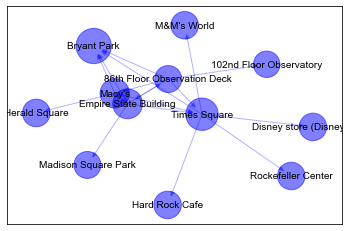

In [139]:
# Plot network

#fig = plt.figure(figsize(16,9), dpi=150)
nodesize = [10000 * n for n in pagerank.values()]
nx.draw_networkx_nodes(G, graph_pos, node_size=nodesize, alpha=.5, node_color='blue')
nx.draw_networkx_edges(G, graph_pos, width=1, alpha=.3, edge_color='blue')
nx.draw_networkx_labels(G, graph_pos, labels=labels, font_size=10, font_family='Arial')